邻接矩阵:
 [[ 0.   25.3  25.09  9.62  2.1   0.    0.    0.    0.    1.14  0.    0.
   0.86 11.85  7.25  2.34  0.    0.    0.    0.    0.    0.    4.25  4.5
   0.    0.    3.11  7.39  3.61  0.    0.  ]
 [25.3   0.   24.84  6.4   0.97  0.    0.    0.    0.    0.    0.    0.
   0.   11.92  6.58  0.    0.    0.    0.    0.    0.    0.    4.55  4.84
   0.    0.    3.27  7.73  3.82  0.    0.  ]
 [25.09 24.84  0.   12.48  3.96  3.27  2.52  2.1   0.    3.56  1.5   0.
   4.11 13.85  8.1   3.86  2.36  0.    1.33  1.09  2.24  0.    4.66  4.97
   0.    0.    3.32  7.63  3.9   1.    2.1 ]
 [ 9.62  6.4  12.48  0.   11.87  9.15  7.73  6.96  6.85 15.28  7.93  6.54
   9.84  7.15  4.1  10.64  7.32  2.32  5.19  7.84  5.09  3.51  3.21  3.35
   4.19  3.05  2.51  3.87  2.83  2.84  2.96]
 [ 2.1   0.97  3.96 11.87  0.    7.62  5.33  8.44  6.84  6.29  9.52  1.51
   6.4   1.77  0.89  5.48  7.29  1.2   6.71  5.92  2.84  1.26  0.84  0.85
   1.34  1.2   0.78  0.88  0.81  1.09  0.89]
 [ 0.    0.    3.27  9.15  7.62  0.

C:\Users\刘玥萌\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31038 (\N{CJK UNIFIED IDEOGRAPH-793E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘玥萌\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘玥萌\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘玥萌\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32476 (\N{CJK UNIFIED IDEOGRAPH-7EDC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\刘玥萌\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: User

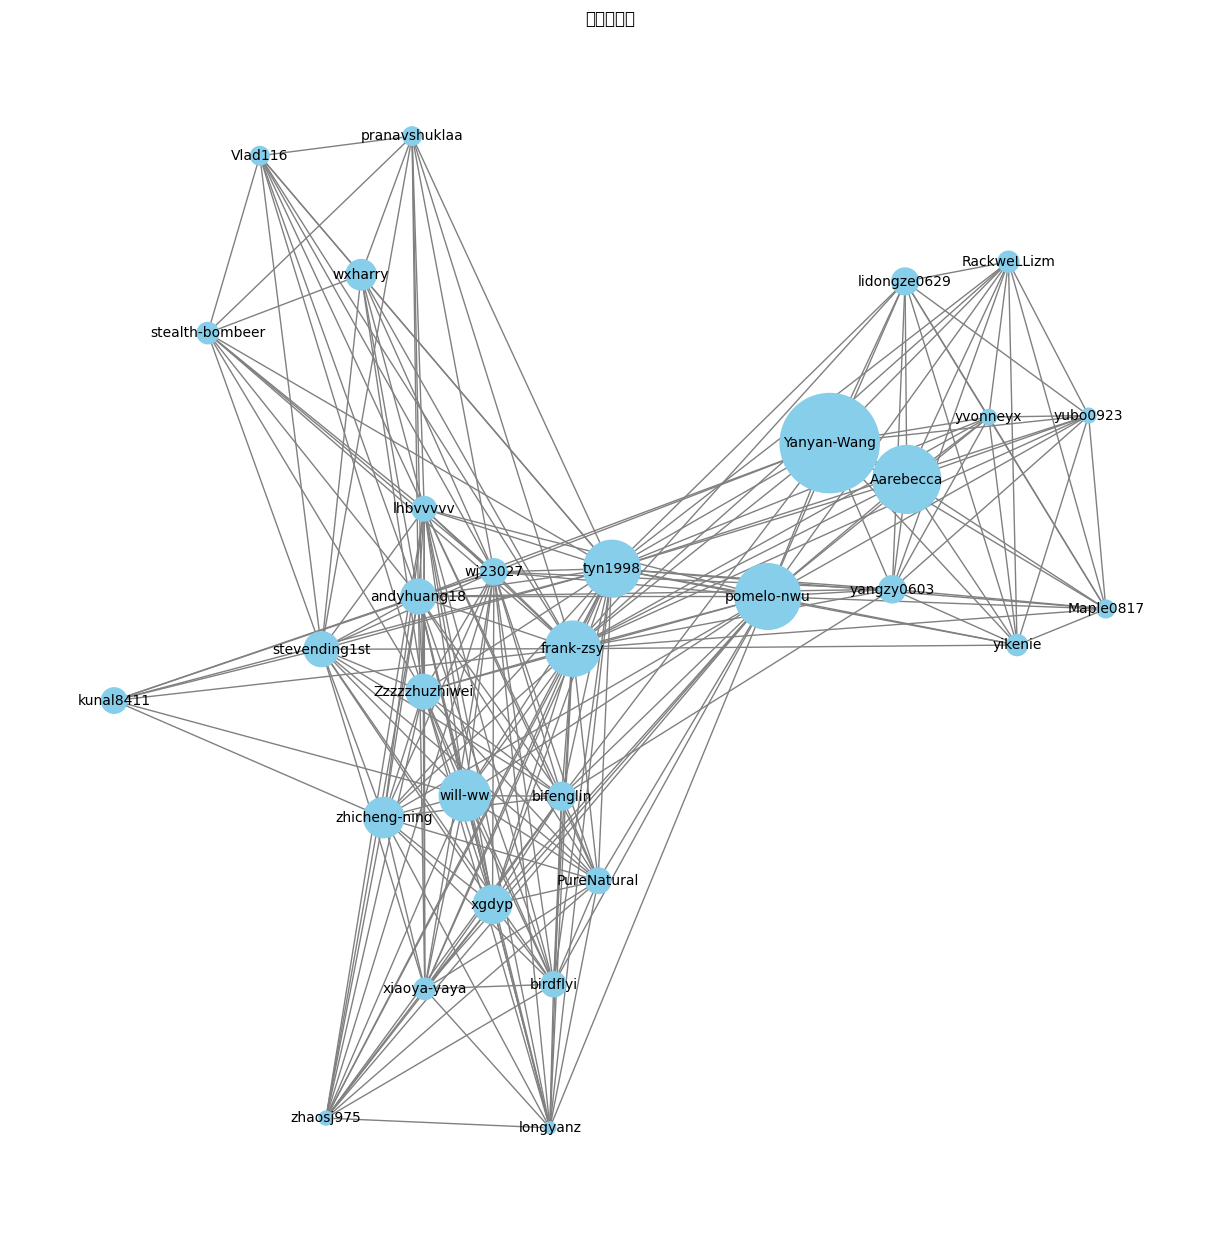

In [7]:
import json
import networkx as nx
import matplotlib.pyplot as plt


# 读取包含社交网络数据的JSON文件
def read_social_network_data(file_path):
    """
    从指定的JSON文件中读取社交网络数据，包括节点和边的信息。

    :param file_path: JSON文件的路径
    :return: 包含节点和边信息的字典
    """
    with open(file_path, 'r') as f:
        data = json.load(f)

    return data


# 创建并初始化社交网络图
def create_social_network_graph(data):
    """
    根据提供的社交网络数据创建无向图，并添加节点和边以及相应的属性。

    :param data: 包含节点和边信息的一个字典
    :return: 创建好的无向图对象
    """
    nodes = data['nodes']
    edges = data['edges']

    G = nx.Graph()

    # 添加节点到图中，并设置节点的影响力分数属性
    for node in nodes:
        G.add_node(node[0], influence_score=node[1])

    # 添加边到图中，并设置边的连接权重属性
    for edge in edges:
        G.add_edge(edge[0], edge[1], weight=edge[2])

    return G


# 1. 社交网络构建与分析
def analyze_social_network_construction(G):
    """
    对社交网络进行构建与分析相关的操作，包括生成邻接矩阵和列出每个用户的直接朋友。

    :param G: 社交网络图对象
    :return: 邻接矩阵和每个用户的直接朋友字典
    """
    # a. 邻接矩阵表示
    adj_matrix = nx.to_numpy_array(G)
    print("邻接矩阵:\n", adj_matrix)

    # b. 列出每个用户的直接朋友
    direct_friends = {node: list(G.neighbors(node)) for node in G.nodes}
    print("每个用户的直接朋友:", direct_friends)

    return adj_matrix, direct_friends


# 2. 统计与度中心性分析
def analyze_degree_centrality_and_influence(G):
    """
    进行统计与度中心性分析，包括计算每个用户的度数、根据影响力分数排序以及综合考虑影响力和朋友数量进行排序。

    :param G: 社交网络图对象
    :return: 度数最多的前5个用户、影响力分数最高的前5个用户、综合影响力和朋友数量最高的前5个用户的列表
    """
    # a. 计算每个用户的度数，列出度数最多的前5个用户
    degree_centrality = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
    print("度数最高的前5个用户:", degree_centrality)

    # b. 对根据影响力分数找出前5个用户
    influence_scores = sorted(G.nodes(data='influence_score'), key=lambda x: x[1], reverse=True)[:5]
    print("影响力分数最高的前5个用户:", influence_scores)

    # c. 综合影响力和朋友数量，找出前5名用户
    combined_score = sorted(
        [(node, G.nodes[node]['influence_score'] * 0.5 + G.degree[node] * 0.5) for node in G.nodes],
        key=lambda x: x[1],
        reverse=True
    )[:5]
    print("综合影响力和朋友数量最高的前5个用户:", combined_score)

    return degree_centrality, influence_scores, combined_score


# 3. 推荐新朋友
def recommend_new_friends_for_user(G, user):
    """
    为指定用户推荐新朋友，包括推荐朋友的朋友以及找出与指定用户连接强度最高的用户。

    :param G: 社交网络图对象
    :param user: 目标用户
    :return: 推荐的新朋友列表和与目标用户连接强度最高的5个用户列表
    """
    # a. 对于指定用户推荐新朋友
    friends = set(G.neighbors(user))
    friends_of_friends = {fof for friend in friends for fof in G.neighbors(friend) if fof!= user and fof not in friends}
    recommended = sorted(friends_of_friends, key=lambda x: len(friends.intersection(set(G.neighbors(x)))), reverse=True)
    recommended_friends = recommended[:5]
    print(f"{user} 的推荐新朋友:", recommended_friends)

    # b. 找出与指定用户连接强度最高的用户
    strongest_connections = sorted(G[user].items(), key=lambda x: x[1]["weight"], reverse=True)[:5]
    print(f"与 {user} 连接强度最高的5个用户:", strongest_connections)

    return recommended_friends, strongest_connections


# 4. 网络图的可视化
def visualize_social_network(G):
    """
    绘制社交网络图，设置节点大小根据影响力分数、节点颜色和边的颜色等可视化属性。

    :param G: 社交网络图对象
    """
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G)
    node_sizes = [G.nodes[node]['influence_score'] * 100 for node in G.nodes]
    nx.draw(G, pos, with_labels=True, node_size=node_sizes, font_size=10, node_color='skyblue', edge_color='gray')
    plt.title("社交网络图")
    plt.show()


if __name__ == "__main__":
    # 读取社交网络数据文件
    file_path = 'hw4_data.json'
    data = read_social_network_data(file_path)

    # 创建社交网络图
    G = create_social_network_graph(data)

    # 1. 社交网络构建与分析
    adj_matrix, direct_friends = analyze_social_network_construction(G)

    # 2. 统计与度中心性分析
    degree_centrality, influence_scores, combined_score = analyze_degree_centrality_and_influence(G)

    # 3. 推荐新朋友
    user = "Yanyan-Wang"
    recommended_friends, strongest_connections = recommend_new_friends_for_user(G, user)

    # 4. 网络图的可视化
    visualize_social_network(G)